# Import libraries and load dataset

Code is base on example from FairLearn and can be found at this link
https://fairlearn.org/v0.9/quickstart.html

In [1]:
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 4.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from fairlearn.datasets import fetch_adult
data = fetch_adult(as_frame=True)

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
print(data.feature_names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [6]:
print(data.target)

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: category
Categories (2, object): ['<=50K', '>50K']


In [7]:
data.DESCR

'**Author**: Ronny Kohavi and Barry Becker  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Adult) - 1996  \n**Please cite**: Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996  \n\nPrediction task is to determine whether a person makes over 50K a year. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))\n\nThis is the original version from the UCI repository, with training and test sets merged.\n\n### Variable description\n\nVariables are all self-explanatory except __fnlwgt__. This is a proxy for the demographic background of the people: "People with similar demographic characteristics should have similar weights". This similarity-statement is not transferable across the 51 different states.\n\n

In [8]:
data

{'data':         age     workclass    fnlwgt     education  education-num  \
 0      25.0       Private  226802.0          11th            7.0   
 1      38.0       Private   89814.0       HS-grad            9.0   
 2      28.0     Local-gov  336951.0    Assoc-acdm           12.0   
 3      44.0       Private  160323.0  Some-college           10.0   
 4      18.0           NaN  103497.0  Some-college           10.0   
 ...     ...           ...       ...           ...            ...   
 48837  27.0       Private  257302.0    Assoc-acdm           12.0   
 48838  40.0       Private  154374.0       HS-grad            9.0   
 48839  58.0       Private  151910.0       HS-grad            9.0   
 48840  22.0       Private  201490.0       HS-grad            9.0   
 48841  52.0  Self-emp-inc  287927.0       HS-grad            9.0   
 
            marital-status         occupation relationship   race     sex  \
 0           Never-married  Machine-op-inspct    Own-child  Black    Male   
 1      

In [9]:
data.data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


In [10]:
# categorical features will be converted with one hot encoding, and numeric features will remain unchanged
X = pd.get_dummies(data.data)
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,226802.0,7.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18.0,103497.0,10.0,0.0,0.0,30.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,257302.0,12.0,0.0,0.0,38.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,40.0,154374.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,58.0,151910.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22.0,201490.0,9.0,0.0,0.0,20.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
data.target == '>50K'

0        False
1        False
2         True
3         True
4        False
         ...  
48837    False
48838     True
48839    False
48840    False
48841     True
Name: class, Length: 48842, dtype: bool

In [12]:
y_true = (data.target == '>50K') * 1
y_true

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64

In [13]:
sex = data.data['sex']
sex

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839    Female
48840      Male
48841    Female
Name: sex, Length: 48842, dtype: category
Categories (2, object): ['Female', 'Male']

In [14]:
sex.value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [15]:
sex.value_counts()/sex.shape[0]

Male      0.668482
Female    0.331518
Name: sex, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

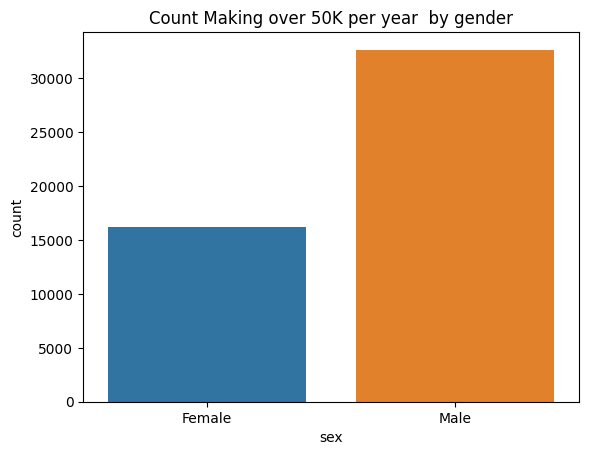

In [16]:
sns.countplot(data=data.data, x='sex')
plt.title('Count Making over 50K per year  by gender')
plt.show

# Fairness metrics

In [17]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf_df = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
clf_df.fit(X, y_true)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

## Accuracy by group

In [19]:
y_pred = clf_df.predict(X)
mf = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=sex)

In [20]:
# overall accuracy
mf.overall

0.8443552680070431

In [21]:
# accuracy by group
mf.by_group

sex
Female    0.925148
Male      0.804288
Name: accuracy_score, dtype: float64

## selection rate (percentage of the population with 1 as their label)

In [22]:
y_true.value_counts()

0    37155
1    11687
Name: class, dtype: int64

In [23]:
y_true.shape

(48842,)

In [24]:
y_true.shape[0]

48842

In [25]:
y_true.value_counts()/y_true.shape[0]

0    0.760718
1    0.239282
Name: class, dtype: float64

<Axes: title={'center': 'Distribution of label 1 making over 50K, 0 making under 50K'}>

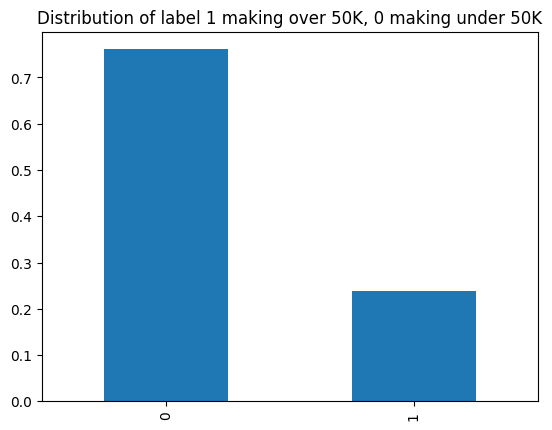

In [26]:
plt.title('Distribution of label 1 making over 50K, 0 making under 50K')
relative_frequencies = y_true.value_counts()/y_true.shape[0]
relative_frequencies.plot(kind='bar')

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [28]:
y_pred.shape

(48842,)

In [29]:
# Count occurrences of value 1
np.count_nonzero(y_pred == 1)

8003

In [30]:
np.count_nonzero(y_pred == 1)/y_pred.shape[0]

0.16385487899758405

In [31]:
np.count_nonzero(y_pred == 0)

40839

In [32]:
np.count_nonzero(y_pred == 0)/y_pred.shape[0]

0.836145121002416

In [33]:
from fairlearn.metrics import selection_rate
sr = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred, sensitive_features=sex)

In [34]:
sr.overall

0.16385487899758405

In [35]:
sr.by_group

sex
Female    0.063550
Male      0.213599
Name: selection_rate, dtype: float64

In [36]:
type (sr.by_group)

pandas.core.series.Series

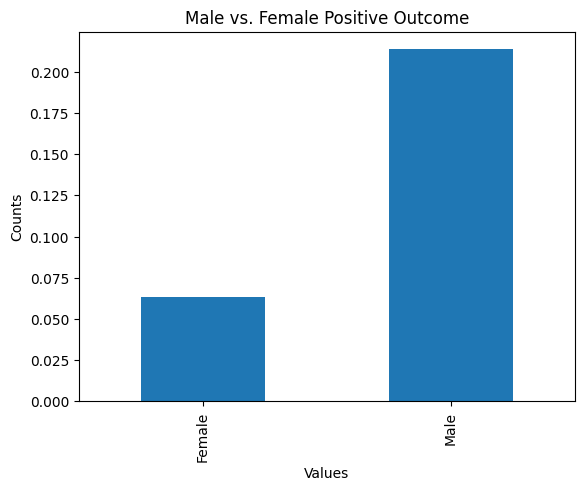

In [37]:
sr.by_group.plot(kind='bar')
plt.title('Male vs. Female Positive Outcome')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.show()

In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, roc_auc_score, roc_curve, average_precision_score, matthews_corrcoef

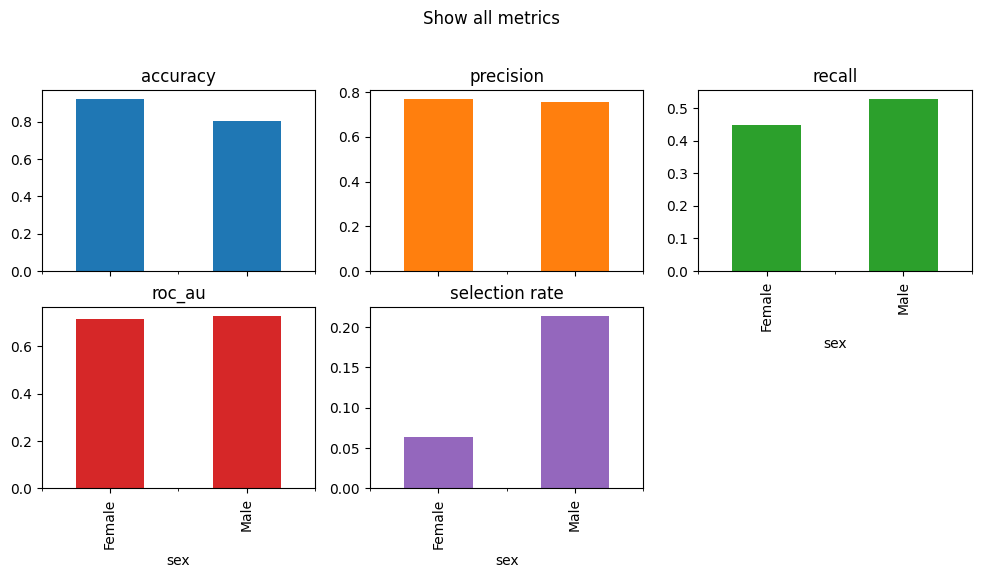

In [39]:
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "roc_au":roc_auc_score,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_true, y_pred=y_pred, sensitive_features=sex
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)
plt.show;

# Mitigating disparity with Demographic Parity

In [40]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
np.random.seed(0)  # set seed for consistent results with ExponentiatedGradient

constraint = DemographicParity()
clf_dt = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
mitigator = ExponentiatedGradient(clf_dt, constraint)
mitigator.fit(X, y_true, sensitive_features=sex)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7b7593446ad0>,
                      estimator=DecisionTreeClassifier(max_depth=4,
                                                       min_samples_leaf=10),
                      nu=0.0008201769357601916)

In [41]:
clf_dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)>

In [42]:
mitigator.get_params

<bound method BaseEstimator.get_params of ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7b7593446ad0>,
                      estimator=DecisionTreeClassifier(max_depth=4,
                                                       min_samples_leaf=10),
                      nu=0.0008201769357601916)>

In [43]:
y_pred_mitigated = mitigator.predict(X)

sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred_mitigated, sensitive_features=sex)

In [44]:
sr_mitigated.overall

0.16614798738790384

In [45]:
sr_mitigated.by_group

sex
Female    0.155262
Male      0.171547
Name: selection_rate, dtype: float64

In [46]:
sr.by_group

sex
Female    0.063550
Male      0.213599
Name: selection_rate, dtype: float64